# Исследование данных для прогнозирования успешности игр в интернет-магазине Стримчик

Цель исследования заключается в анализе исторических данных о продажах компьютерных игр, оценках пользователей и экспертов, жанрах, платформах и возрастных рейтингах с целью выявления закономерностей, определяющих успешность игр. Эти выявленные закономерности будут использованы для разработки прогностических моделей, а также для планирования эффективных рекламных кампаний в интернет-магазине Стримчик.

**Описание данных**

`Name` — название игры

`Platform` — платформа

`Year_of_Release` — год выпуска

`Genre` — жанр игры

`NA_sales` — продажи в Северной Америке 

`EU_sales` — продажи в Европе 

`JP_sales` — продажи в Японии

`Other_sales` — продажи в других странах

`Сritic_Score` — оценка критиков (от 0 до 100)

`User_Score` — оценка пользователей (от 0 до 10)

`Rating` — рейтинг от организации ESRB

**План действий**
1. [Загрузка данных](#Загрузка-данных)
2. [Предобработка данных](#Предобработка-данных)
3. [Исследовательский анализ данных](#Исследовательский-анализ-данных)
4. [Портрет пользователя каждого региона](#Портрет-пользователя-каждого-региона)
5. [Проверка гипотиз](#Проверка-гипотиз)
6. [Вывод](#Вывод)

In [1]:
#подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

## Загрузка данных

### Загрузка данных из csv-файлов

In [2]:
#считаем данные из csv файла games
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    print('There is no such file')

### Изучение общей информации о полученных датафреймах

In [3]:
#выведем основную информацию о датафрейме
display(data)
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#посмотрим в каких колонках содержатся пропущенные значения
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

**Вывод: Исходя из предоставленной информации о датафрейме, основное внимание следует уделить обработке пропущенных или отсутствующих значений, а также требуется изменить типы данных колонок `Year_of_Release`, `User_Score`**

## Предобработка данных

### Приведение названий столбцов к нижнему регистру 

In [5]:
data.columns = data.columns.str.lower()

In [6]:
#проверим
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы

In [7]:
#рассчитаем процент пропущенных значений от общего колличества записей в колонке 'year_of_release'
data['year_of_release'].isna().sum() / data.shape[0] * 100

1.609332934489979

Поскольку объем данных с пропущенными значениями составляет менее 2%, мы можем безболезненно удалить их.

In [8]:
data = data.dropna(subset = ['year_of_release'])

In [9]:
#изменим тип данных в колонке year_of_release
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y').dt.year

In [10]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Исходя из того, что "TBD" означает "To Be Determined" (англ. "будет определено") и указывает на отсутствие информации или неопределенные детали, мы можем заменять "TBD" на значение NaN в наших данных.

In [11]:
#изменим тип данных в колонке user_score
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


*Мы успешно преобразовали типы данных в столбцах `year_of_release` и `user_score`, а также обработали значения "TBD". Кроме того, мы избавились от строк с пропущенными значениями в столбце `date_release`.*

### Обработка пропусков

In [13]:
#посмотрим в каких колонках содержатся пропущенные значения
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

Из-за небольшого объема пропущенных значений в колонках `name` и `genre`, мы можем безопасно удалить соответствующие строки из нашего датафрейма.

In [14]:
#удалим строчки с пропусками
data = data.dropna(subset = ['name', 'genre'])

Поскольку оценка игры является субъективным параметром, мы оставим пропущенные значения в соответствующих столбцах без изменений. Для дальнейшей оценки зависимости рейтинга, пропуски в этом столбце мы заполним единым значением 'no rating'.

In [15]:
data['rating'] = data['rating'].fillna('no rating')

### Cуммарные продажи во всех регионах

In [16]:
#добавим столбец total_sales
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [17]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no rating,31.38


### Проверка на дубликаты

In [18]:
print(f'Размер df до удаления дубликатов - {data.shape[0]}')

Размер df до удаления дубликатов - 16444


**Явные дубликаты**

In [19]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено 

**Неявные дубликаты**

Для дальнейшего поиска дубликатов, приведем столбцы `name` и `platform` к нижнему регистру.

In [20]:
data[['name', 'platform']] = data[['name', 'platform']].applymap(str.lower)
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first', inplace=True)
print(f'Размер df после удаления дубликатов - {data.shape[0]}')

Размер df после удаления дубликатов - 16443


**Вывод: Мы привели названия столбцов к нижнему регистру, изменили типы данных для столбцов `year_of_release` и `user_score`. Мы также удалили строки с пропущенными значениями в столбцах `name` и `genre` из-за их небольшого количества. Пропуски в столбцах `critic_score`, `user_score` и `rating` оставили без изменений из-за субъективности данных параметров. Вероятные причины пропусков в указанных столбцах могут включать технические проблемы при загрузке данных, а также возможность того, что рейтинги еще не были назначены для некоторых игр из-за их недавнего выпуска. Добавили новый столбец, в котором подсчитали суммарные продажи во всех регионах. Мы также проверили данные на наличие дубликатов и успешно от них избавились.**

##  Исследовательский анализ данных

### Колличество игр по годам
Изучим сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

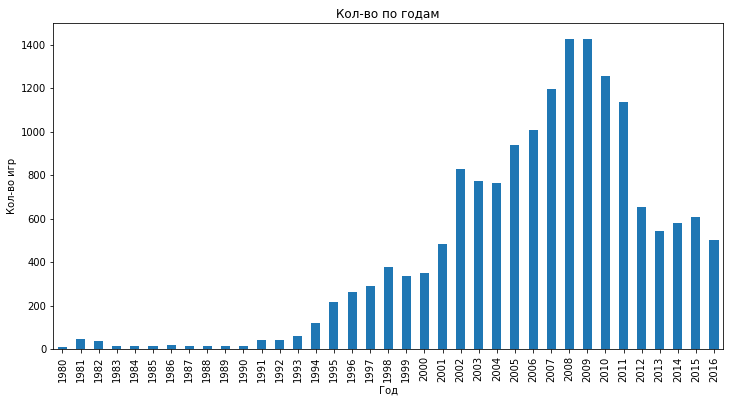

In [21]:
data.groupby('year_of_release')['name'].count().plot(
                         kind='bar',
                         xlabel='Год',
                         ylabel='Кол-во игр',
                         title='Кол-во по годам',
                         figsize = (12,6));

Заметно, что рост количества выпускаемых игр начался с 1994 года, с резким скачком в 2002 году. Наивысшая точка достигнута в 2008-2009 годах, когда ежегодное количество выпущенных игр превышало 1400. После этого произошел спад, вероятно, вызванный развитием мобильных технологий, что снизило интерес к традиционным играм.

### Динамика продаж по платформам
Как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?

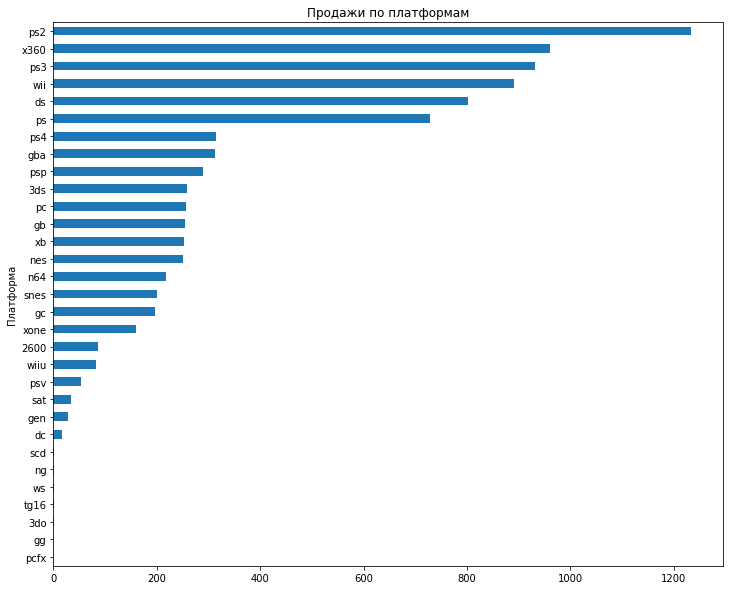

In [22]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(
                         kind='barh',
                         xlabel='Платформа',
                         ylabel='Кол-во игр',
                         title='Продажи по платформам',
                         figsize = (12,10));

Из графика видно, что самыми популярными игровыми платформми за весь период являются: PS2, X360, PS3, Wii, DS, PS.

In [23]:
# код ревьюера
data.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(6).index.to_list()


['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

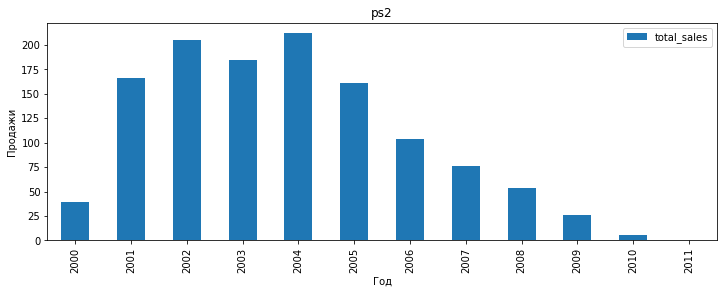

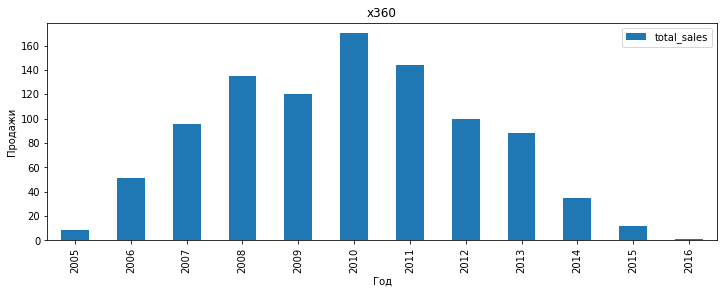

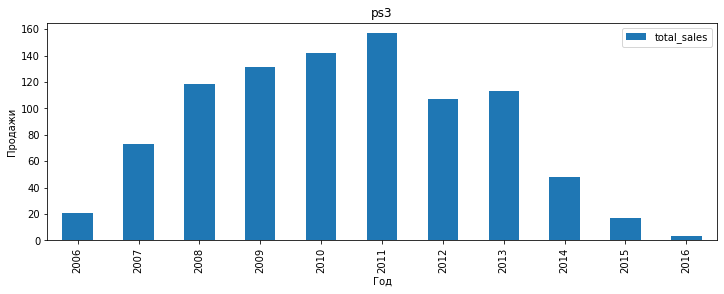

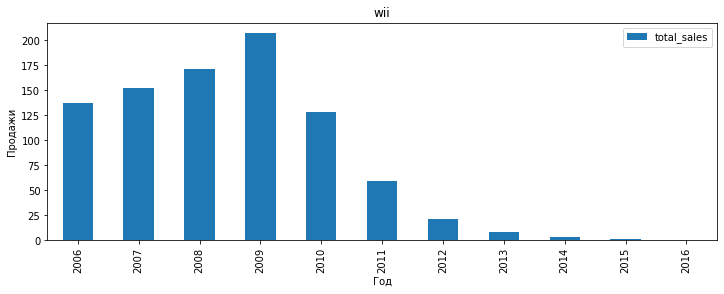

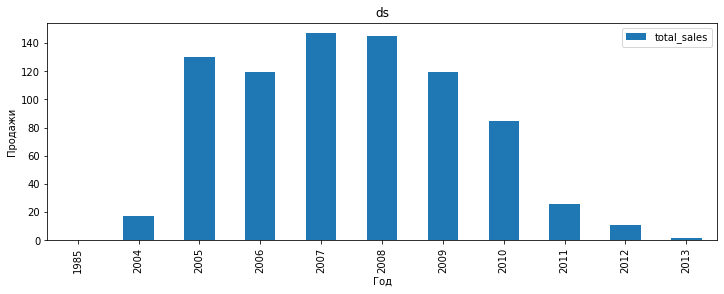

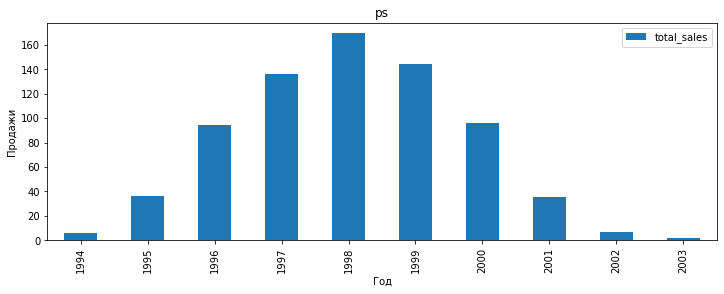

In [24]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index.to_list()
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', xlabel='Год', ylabel='Продажи', title = platform, figsize=(12,4))

Мы получили аномальную запись для приставки DS, избавимся от нее

In [25]:
data.query('platform == "ds" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,ds,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,no rating,0.02


In [26]:
data = data.drop(data.query('platform == "ds" and year_of_release < 2004').index).reset_index(drop=True)

In [27]:
for platform in top_platforms:
    print(f'Продолжительность жизни {platform} - {data[data["platform"] == platform]["year_of_release"].max() - data[data["platform"] == platform]["year_of_release"].min()}')

Продолжительность жизни ps2 - 11
Продолжительность жизни x360 - 11
Продолжительность жизни ps3 - 10
Продолжительность жизни wii - 10
Продолжительность жизни ds - 9
Продолжительность жизни ps - 9


Исходя из полученных данных, мы можем сказать, что средняя продолжительность жизни игровой платформы составляет примерно 10 лет.

### Определение актуального периода для анализа

Из анализа графика 3.2 видно, что даже самые популярные игровые платформы переживают спад. Этот спад, вероятно, связан с тем, что они постепенно уступают место более новым и продвинутым платформам. Поэтому логично ориентироваться на годы, когда происходит резкое снижение продаж среди самых новых консолей из нашего топа.

Если рассмотреть, например, платформы PS3 и Xbox 360, то можно заметить резкий спад в продажах в районе 2014 года, что, вероятно, свидетельствует о выходе более нового поколения консолей. Поэтому для дальнейшего анализа и прогнозирования стоит рассматривать данные, начиная с 2014 года.

In [28]:
actual_data = data[data['year_of_release'] > 2013]
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no rating,14.63
42,grand theft auto v,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no rating,11.68
77,fifa 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no rating,7.98


In [29]:
print(f'Новый размер df - {actual_data.shape[0]} строк')

Новый размер df - 1689 строк


*В нашем исследовании мы удаляем все данные, датирующиеся до 2014 года, с целью работы с более актуальной информацией. Это позволило нам избавиться от устаревших данных и сосредоточиться на актуальных.*

### Потенциально прибыльные платформы.

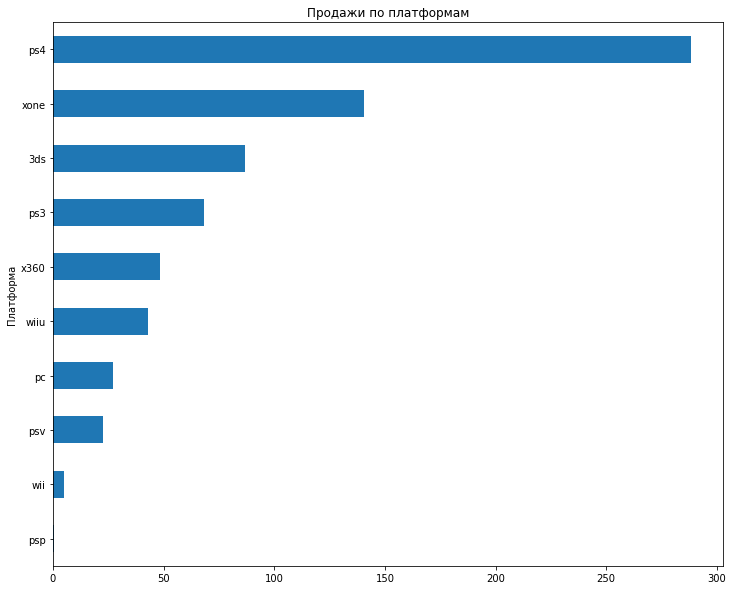

In [30]:
actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=True).plot(
                         kind='barh',
                         xlabel='Платформа',
                         ylabel='Кол-во игр',
                         title='Продажи по платформам',
                         figsize = (12,10));

После обновления данных и среза до 2014 года, наш топ игровых платформ изменился. Теперь лидирующие платформы включают PS4, Xbox One, 3DS, PS3, Xbox 360 и WiiU. Давайте более детально изучим их характеристики и динамику, чтобы лучше понять, какие платформы наиболее актуальны и перспективны для дальнейшего анализа.

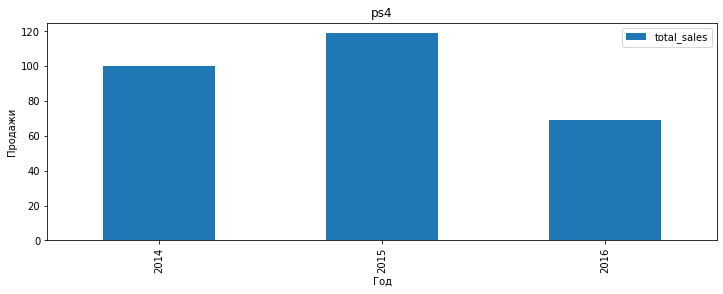

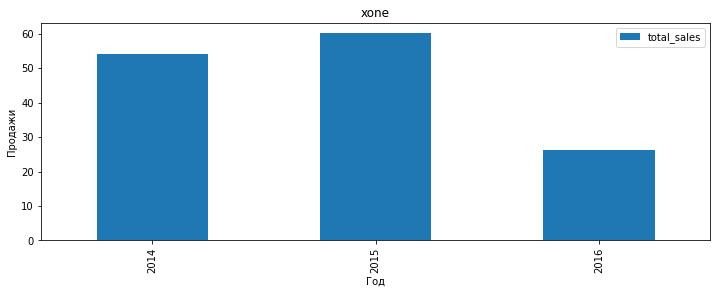

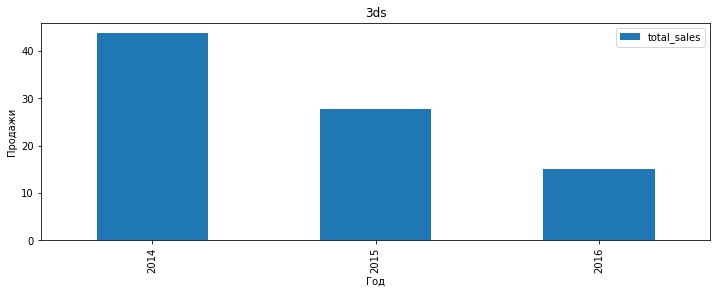

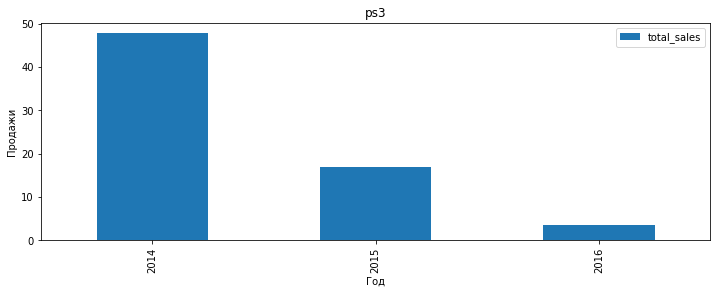

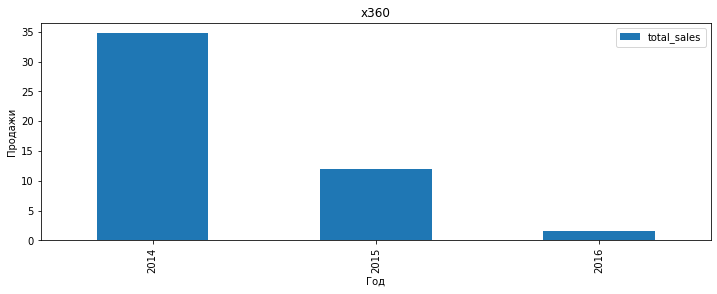

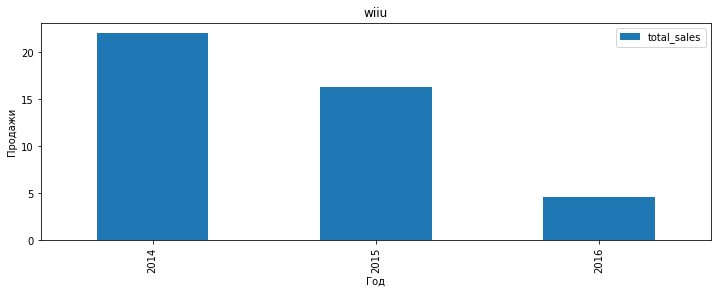

In [31]:
top_platforms = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6).index.to_list()
for platform in top_platforms:
    actual_data[actual_data['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', xlabel='Год', ylabel='Продажи', title = platform, figsize=(12,4))

*Из анализа видно, что такие платформы как PS3, Xbox 360 и WiiU, к 2016 году почти исчезли с рынка из-за своего технического устаревания, а платформа 3DS, хотя и продолжает существовать, также показывает заметный спад. С другой стороны, платформы PS4 и Xbox One, являющиеся последними версиями своих предшественников, удерживают свои позиции. Можно сказать, что платформы PS4 и Xbox One обладают высоким потенциалом и перспективами на рост, что делает их потенциально прибыльными на рассматриваемом периоде.*

###  График box-plot по глобальным продажам игр в разбивке по платформам

In [32]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
pc,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
ps3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
ps4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
psp,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
psv,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
wiiu,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
x360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


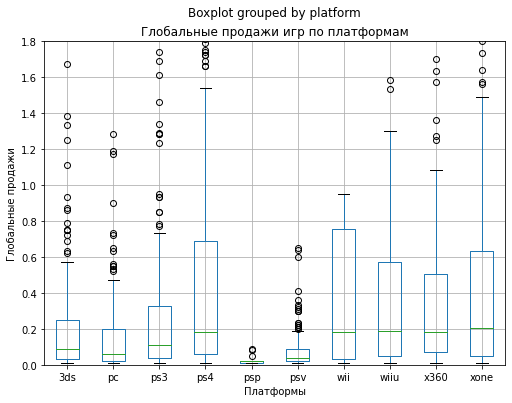

In [33]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(8,6))
plt.title('Глобальные продажи игр по платформам')
plt.xlabel('Платформы')  # Подпись оси X
plt.ylabel('Глобальные продажи')
plt.ylim(0, 1.8);

*Анализируя графики box plot, мы можем выделить явных лидеров среди игровых платформ по медианным продажам, а также по максимальным значениям, которые не входят в выбросы. Лидирами в данном контексте можно считать PS4, Wii, Xbox 360 и Xbox One, а также WiiU. Важно отметить, что позиция Xbox One и PlayStation 4 объясняется их относительно более поздним появлением на рынке, и, вероятнее всего, их показатели будут продолжать расти в будущем.*

*Интересно, что почти каждая из перечисленных платформ имеет большое количество выбросов, что, вероятно, связано с эксклюзивами для конкретной платформы, успешностью определенных игр или другими факторами, способствующими выдающимся продажам.*

### Влияние отзывов на продажи

Анализ влияния отзывов на продажи будет проводиться на примере наиболее популярной консоли нового поколения, PS4.

In [34]:
def create_scatter(platform, score, score_name):
    actual_data[actual_data.platform == platform].plot(x='total_sales', y=score, kind='scatter', alpha=0.6, figsize=(9, 6))
    plt.xlabel('Продажи (млн)')
    plt.ylabel('Оценка критиков')
    plt.title(f'График зависимости продаж и оценки {score_name} для платформы {platform}')
    plt.show()

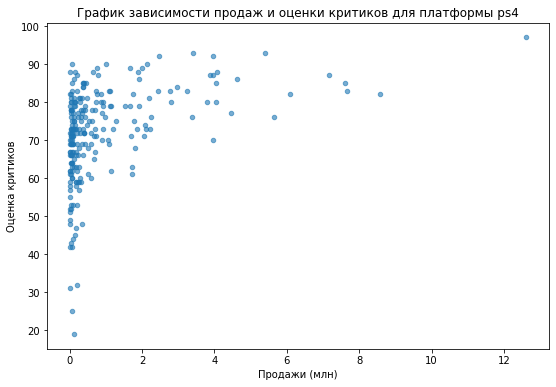

In [35]:
#построим граффик рассеивания
create_scatter('ps4', 'critic_score', 'критиков')

In [36]:
#Рассчитаем процент корреляции Пирсона
actual_data[actual_data.platform == "ps4"]['total_sales'].corr(actual_data[actual_data.platform == "ps4"]['critic_score'])

0.40266141068104083

*Мы получили умеренный коэффициент корреляции*

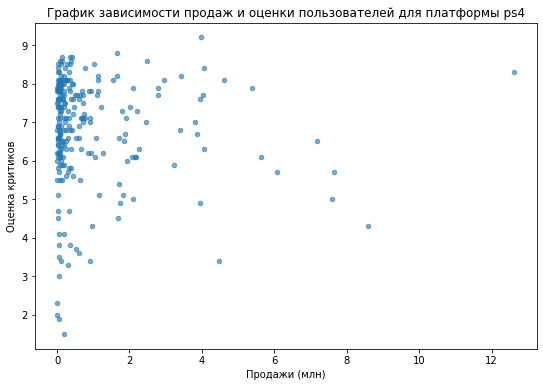

In [37]:
create_scatter('ps4', 'user_score', 'пользователей')

In [38]:
#Рассчитаем процент корреляции Пирсона
actual_data[actual_data.platform == "ps4"]['total_sales'].corr(actual_data[actual_data.platform == "ps4"]['user_score'])

-0.040131589472697356

*Корреляция отсутствует*

*Из анализа данный граффиков можно выделить следующую закономерность: с увеличением оценок критиков, общие продажи игр также увеличиваются. Эту тенденцию подтверждает и коэффициент корреляции Пирсона, равный 0.4, который указывает на положительную корреляцию между оценками критиков и общими продажами. Корреляции между общими продажами и оценкой пользователей нет.*

### Проведем анализ аналогичных закономерностей для других игровых платформ, входящих в наш топ, с целью подтвердить установленные зависимости и оценить их общность на популярных платформах.

      Корреляция отзывов критиков для платформы xone: 0.43
      Корреляция отзывов пользователей для платформы xone: -0.07


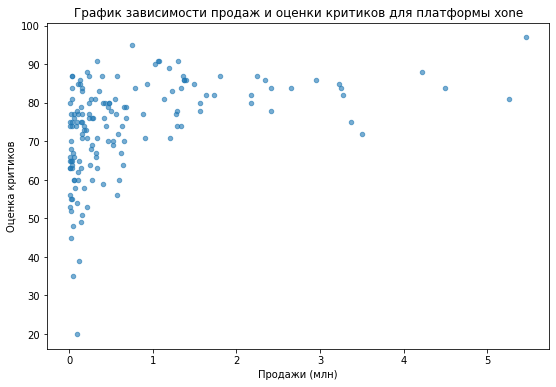

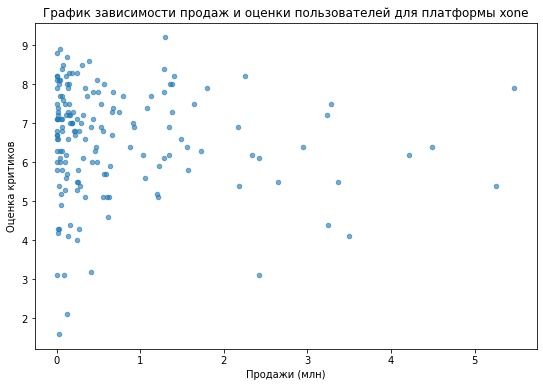




      Корреляция отзывов критиков для платформы 3ds: 0.31
      Корреляция отзывов пользователей для платформы 3ds: 0.22


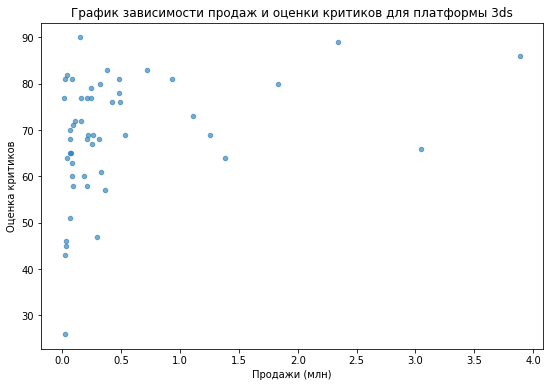

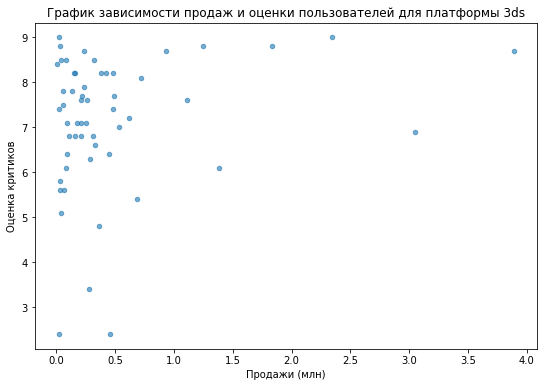




      Корреляция отзывов критиков для платформы ps3: 0.45
      Корреляция отзывов пользователей для платформы ps3: -0.17


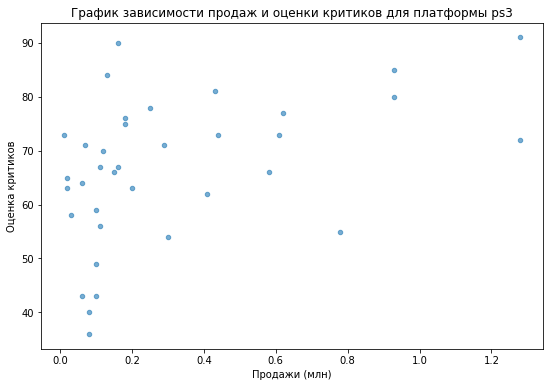

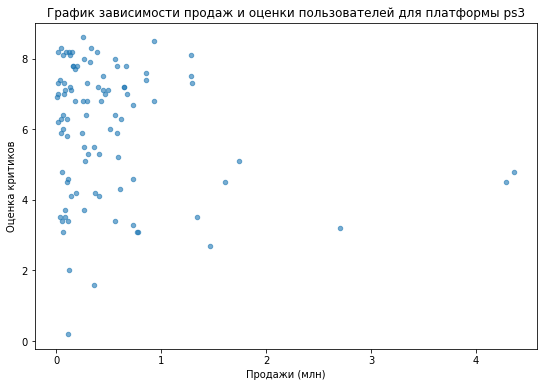




      Корреляция отзывов критиков для платформы x360: 0.53
      Корреляция отзывов пользователей для платформы x360: -0.14


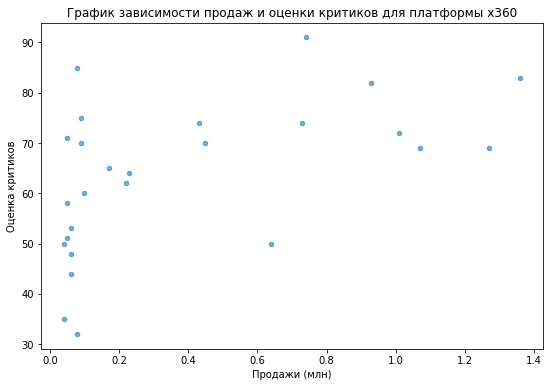

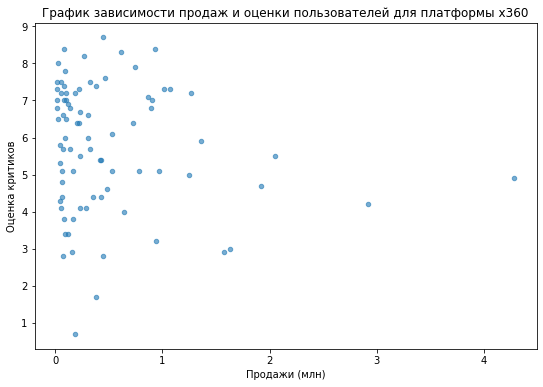




      Корреляция отзывов критиков для платформы wiiu: 0.37
      Корреляция отзывов пользователей для платформы wiiu: 0.41


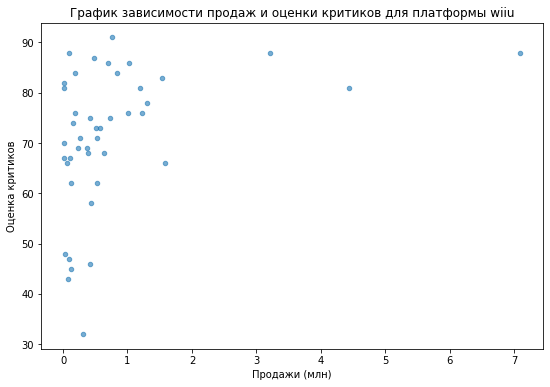

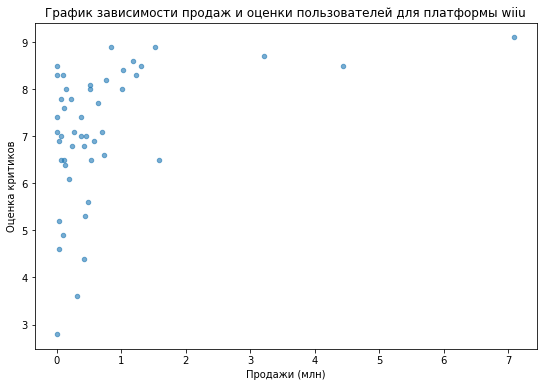

In [39]:
for platform in top_platforms[1:]:
    correlation = round(actual_data[actual_data['platform'] == platform]['total_sales'].corr(actual_data[actual_data['platform'] == platform]['critic_score']), 2)
    print(f"      Корреляция отзывов критиков для платформы {platform}: {correlation}")
    correlation = round(actual_data[actual_data['platform'] == platform]['total_sales'].corr(actual_data[actual_data['platform'] == platform]['user_score']), 2)
    print(f"      Корреляция отзывов пользователей для платформы {platform}: {correlation}")
    create_scatter(platform, 'critic_score', 'критиков')
    create_scatter(platform, 'user_score', 'пользователей')
    print()
    print()
    print()

*Полученные результаты подтверждают данную тенденцию для других популярных игровых платформ, за исключением таких платформ как Wii U и 3DS, у которых коэффициент корреляции Пирсона для отзывов пользователей составляет 0.41 и 0.22 соответсвенно, что указывает на умеренную степень корреляции.*

### Общее распределение игр по жанрам

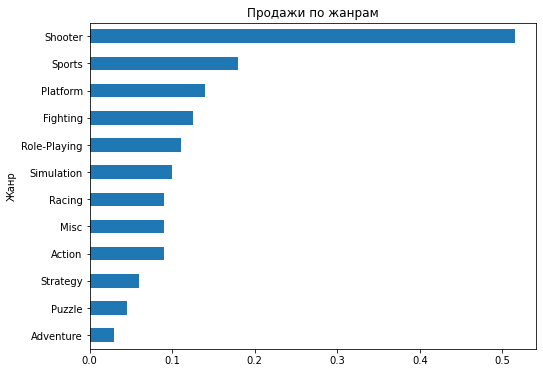

In [40]:
actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=True).plot(
                         kind='barh',
                         xlabel='Жанр',
                         ylabel='Продажи',
                         title='Продажи по жанрам',
                         figsize = (8,6));

In [41]:
actual_data.pivot_table(index='genre', values = 'total_sales', aggfunc='median').sort_values(
    by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


*Из анализа можно сделать выводы, что определенные жанры, такие как шутеры (с медианными продажами 500 тыс.), спортивные игры (180 тыс.) и платформеры (140 тыс.), являются яркими лидерами. В то время как приключенческие игры (30 тыс.), стратегии (45 тыс.) и головоломки (60 тыс.) демонстрируют значительно более низкие результаты.
Этот анализ подчеркивает, что существует выраженное различие по продажам между различными жанрами. На рынке игровой индустрии имеются как яркие лидеры, так и категории, которые не пользуются большой популярностью среди покупателей.*

**Вывод: Из граффика видно, что рост количества выпускаемых игр начался с 1994 года, с резким скачком в 2002 году, достигая пика в 2008-2009 годах, когда количество выпущенных игр в год превышало 1400. Затем наступил спад, вероятно, вызванный развитием мобильных технологий, что снизило интерес к традиционным играм.**

**Анализ платформ показал, что средняя продолжительность жизни игровой платформы составляет приблизительно 10 лет. В нашем исследовании мы удалили все данные, датированные до 2014 года, чтобы работать с более актуальной информацией, что позволило сосредоточиться на актуальных данных.** 

**После обновления данных и среза до 2014 года, наш топ игровых платформ изменился, и теперь лидирующими платформами являются PS4, Xbox One, 3DS, PS3, Xbox 360 и WiiU. Эти платформы обладают потенциалом для дальнейшего роста.** 

**Анализ box plot показал, что такие платформы как PS4, Wii, Xbox 360 и Xbox One, а также WiiU имеют наивысшие медианные продажи, а также значительное количество выбросов, что свидетельствует о успешности отдельных игр и эксклюзивах для этих платформ. Позиция Xbox One и PlayStation 4 объясняется их более поздним появлением на рынке, и их показатели склонны к росту.** 

**Анализ влияния оценок на продажи показал, что с увеличением оценок критиков, общие продажи игр также увеличиваются, и это подтверждается коэффициентом корреляции Пирсона.** 

**Из анализа жанров можно сделать выводы, что определенные жанры, такие как шутеры (с медианными продажами 500 тыс.), спортивные игры (180 тыс.) и платформеры (140 тыс.), являются яркими лидерами. В то время как приключенческие игры (30 тыс.), стратегии (60 тыс.) и головоломки (45 тыс.) демонстрируют значительно более низкие результаты.**

## Портрет пользователя каждого региона
Определим самые популярные платформы, жанры и выясним влияет ли рейтинг ESRB на продажи для пользователя каждого региона (NA, EU, JP).

In [42]:
def create_bar(groupby, region, xlable, title):
    actual_data.groupby(groupby)[region].sum().sort_values(ascending=False)[:5].plot(
                         kind='bar',
                         xlabel=xlable,
                         ylabel='Продажи',
                         title=title,
                         figsize = (12,6));

### Популярные платформы по регионам

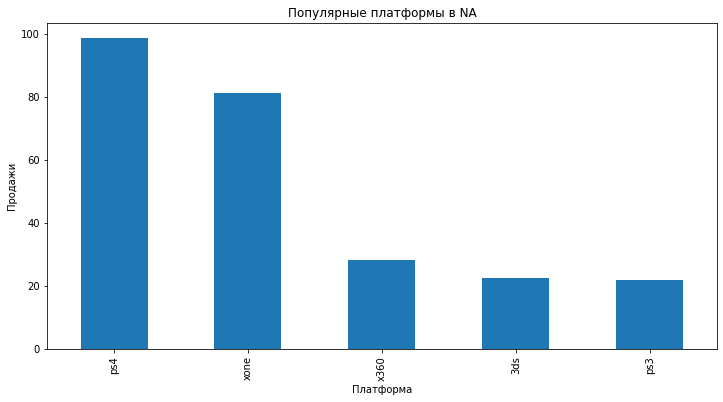

In [43]:
create_bar('platform', 'na_sales', 'Платформа', 'Популярные платформы в NA')

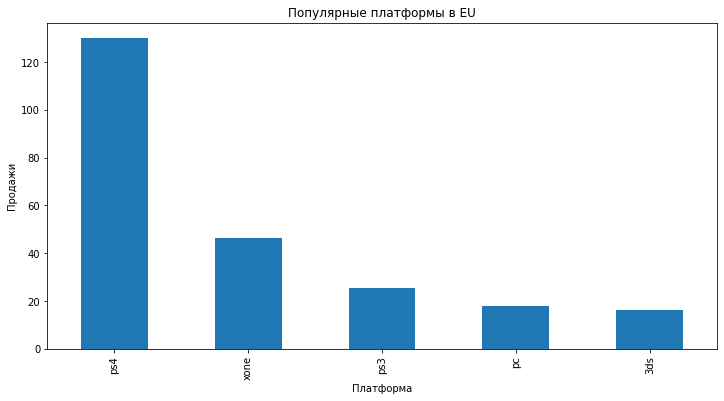

In [44]:
create_bar('platform', 'eu_sales', 'Платформа', 'Популярные платформы в EU')

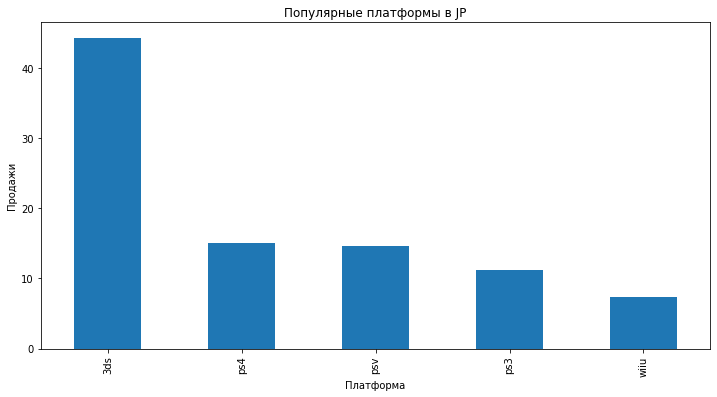

In [45]:
create_bar('platform', 'jp_sales', 'Платформа', 'Популярные платформы в JP')

Из анализа графиков видно, что рейтинги популярных платформ в Северной Америке и Европе очень похожи. Однако c Японией наблюдается значительное различие.
- NA: PS4, Xbox One, Xbox 360, 3DS, PS3
- EU: PS4, Xbox One, PS3, PC, 3DS 
- JP: 3DS, PS4, PSV, PS3, WiiU

### Популярные жанры по регионам

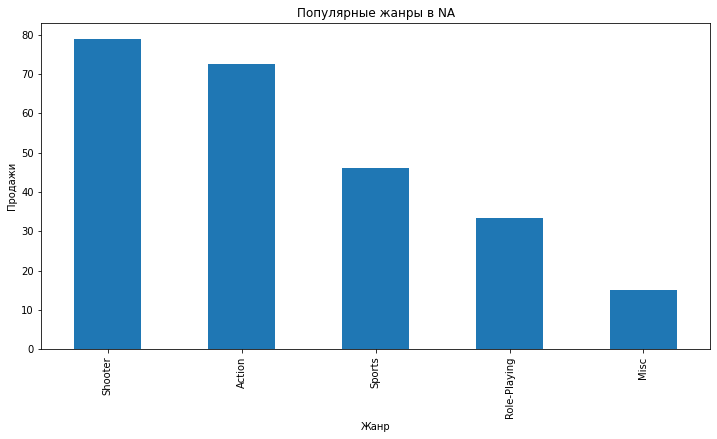

In [46]:
create_bar('genre', 'na_sales', 'Жанр', 'Популярные жанры в NA')

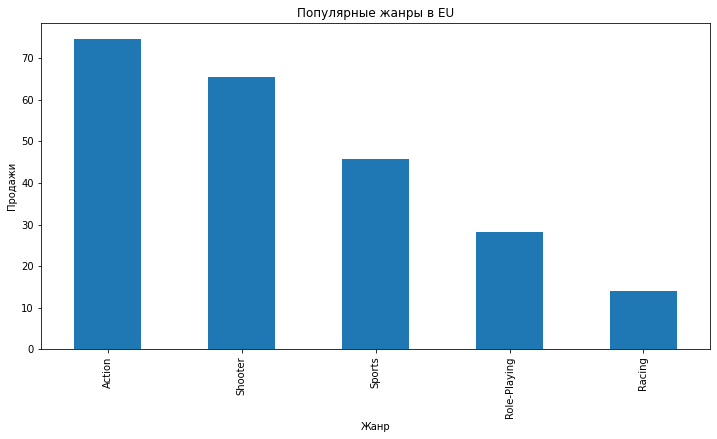

In [47]:
create_bar('genre', 'eu_sales', 'Жанр', 'Популярные жанры в EU')

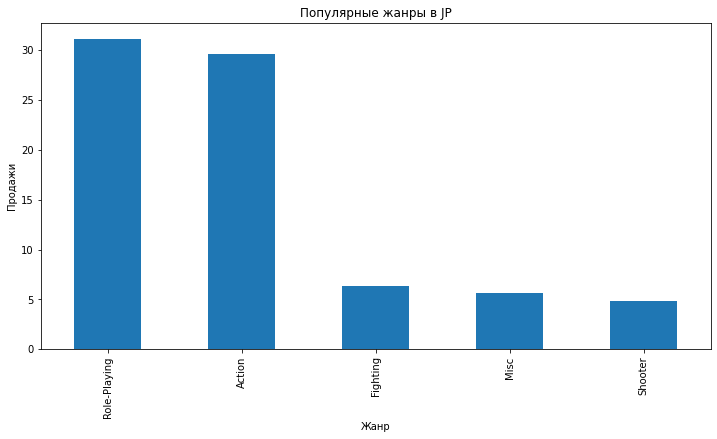

In [48]:
create_bar('genre', 'jp_sales', 'Жанр', 'Популярные жанры в JP')

Анализ жанров по регионам также показывает значительные различия Европы и Северной Америки с Японией. В Европе и Северной Америке наиболее популярными жанрами являются экшн и шутеры, однако в Японии лидирующее место занимает ролевая игра, в то время как в Европе и Северной Америке она находится лишь на 4 месте.

- NA: Shooter, Action, Sports, Role-Playing, Misc
- EU: Action, Shooter, Sports, Role-Playing, Racing
- JP: Role-Playing, Action, Fighting, Misc, Shooter

### Влияние рейтинга ESRB на продажи

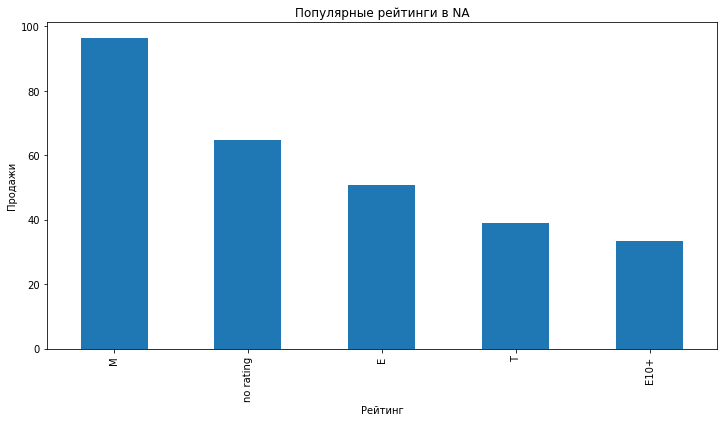

In [49]:
create_bar('rating', 'na_sales', 'Рейтинг', 'Популярные рейтинги в NA')

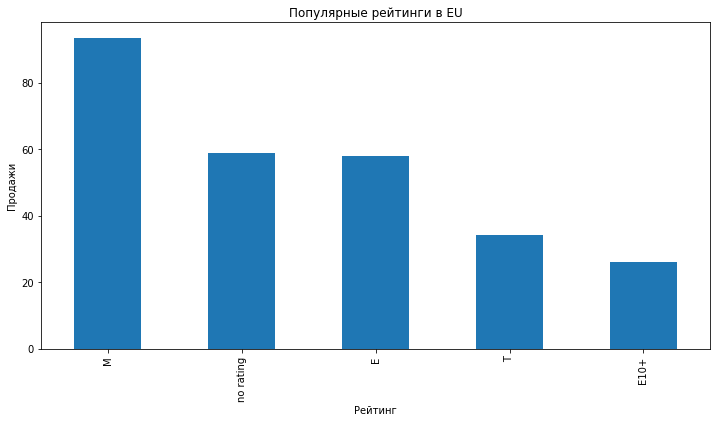

In [50]:
create_bar('rating', 'eu_sales', 'Рейтинг', 'Популярные рейтинги в EU')

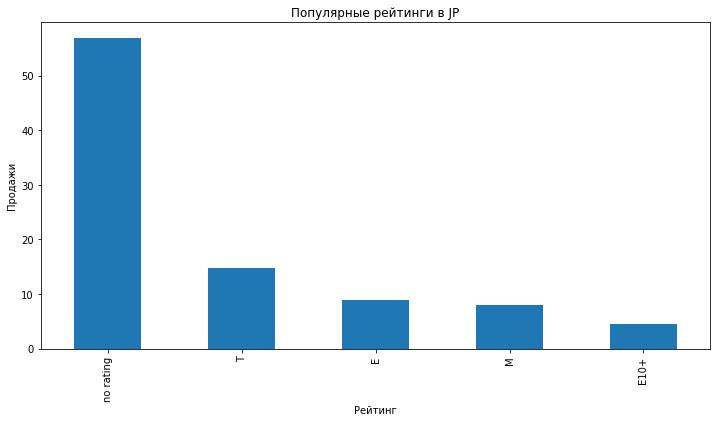

In [51]:
create_bar('rating', 'jp_sales', 'Рейтинг', 'Популярные рейтинги в JP')

В анализе рейтингов та же ситуация: предпочтительные рейтинги в Европе и Северной Америке идентичны, но весомо отличаются от предпочтений в Японии.
Интересной особенностью является тот факт, что игры без рейтинга занимают лидирующие позиции в каждом из регионов, и это явление наиболее выражено в Японии.

- NA: M, No rating, E, T, E10+
- EU: M, No rating, E, T, E10+
- JP: No rating, T, E, M, E10+

**После изучения данных по платформам, жанрам и рейтингам в регионах Европа, Северная Америка и Япония мы пришли к выводу, что ситуация в Европе и Северной Америке очень схожа по всем аспектам, однако, с Японией наблюдаются значительные различия. Эти различия вероятнее всего вызваны культурными особенностями и ценностями в каждом регионе.**

## Проверка гипотиз 

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- H_0: Средние пользовательские рейтинги на платформе Xbox One = Средние пользовательские рейтинги на платформе PC
- H_1: Средние пользовательские рейтинги на платформе Xbox One != Средние пользовательские рейтинги на платформе PC

In [52]:
xbox_users = actual_data.query('platform == "xone"')['user_score']
pc_users = actual_data.query('platform == "pc"')['user_score']
print(len(xbox_users), len(pc_users))

228 151


In [53]:
pc_users

455      3.9
1515     5.4
1658     NaN
1710     7.9
2273     5.7
        ... 
16237    7.9
16246    1.4
16344    NaN
16358    NaN
16419    7.6
Name: user_score, Length: 151, dtype: float64

*Из-за существенных различий в размерах выборок, мы используем параметр equal_var=False.*

In [54]:
alpha = .05 
            
results = st.ttest_ind(
    xbox_users, 
    pc_users,
    nan_policy = 'omit',
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): # код ревьюера
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.

### Средние пользовательские рейтинги жанров Action и  Sports не равны
- H_0: Средние пользовательские рейтинги Action = Средние пользовательские рейтинги Sports
- H_1: Средние пользовательские рейтинги Action != Средние пользовательские рейтинги Sports

In [55]:
action_genre = actual_data.query('genre == "Action"')['user_score']
sports_genre = actual_data.query('genre == "Sports"')['user_score']
print(len(action_genre), len(sports_genre))

619 161


In [56]:
alpha = .05 
            
results = st.ttest_ind(
    action_genre, 
    sports_genre,
    nan_policy = 'omit',
    equal_var = False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha): # код ревьюера
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.182555038264477e-14
Отвергаем нулевую гипотезу


С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия

**Вывод:**

**Проведя проверку гипотиз мы можем утвержать следующее**
- Средние пользовательские рейтинги на платформах Xbox One и PC равны
- Средние пользовательские рейтинги жанров Action и Sports не равны


## Вывод

**Загрузка данных** 

После успешной загрузки датафрейма стало очевидным, что основное внимание следует уделить обработке отсутствующих значений и изменению типов данных в следующих столбцах: `Year_of_Release` и `User_Score`.

**Предобработка данных**

Мы привели названия столбцов к нижнему регистру, изменили типы данных для столбцов `year_of_release` и `user_score`. Также мы удалили строки с пропущенными значениями в столбцах `name`, `genre`, и `year_of_release` из-за их небольшого количества. Пропуски в столбцах `critic_score`, `user_score` оставили без изменений из-за субъективности данных параметров. Пропуски  в столбце `rating` заполнили значением 'No rating'. Вероятные причины пропусков в указанных столбцах могут включать технические проблемы при загрузке данных, а также возможность того, что рейтинги еще не были назначены для некоторых игр из-за их недавнего выпуска. Добавили новый столбец, в котором подсчитали суммарные продажи во всех регионах. Мы также проверили наличие дубликатов в данных и обнаружили, что они отсутствуют.

**Исследовательский анализ данных**

- Рост количества выпускаемых игр начался с 1994 года, с резким скачком в 2002 году, достигая пика в 2008-2009 годах, когда количество выпущенных игр в год превышало 1400. Затем наступил спад, вероятно, вызванный развитием мобильных технологий, что снизило интерес к традиционным играм.
- Средняя продолжительность жизни игровой платформы составляет около 10 лет. В нашем исследовании мы удалили все данные, датированные до 2014 года, чтобы сосредоточиться на актуальных данных.
- После обновления данных и среза до 2014 года, топ игровых платформ изменился, и теперь лидирующими платформами являются PS4, Xbox One, 3DS, PS3, Xbox 360 и WiiU. Эти платформы обладают потенциалом для дальнейшего роста.
- Анализ box plot показал, что платформы PS4, Wii, Xbox 360 и Xbox One, а также WiiU имеют наивысшие медианные продажи, а также значительное количество выбросов, что свидетельствует о успешности отдельных игр и эксклюзивах для этих платформ. Позиция Xbox One и PlayStation 4 объясняется их более поздним появлением на рынке, и их показатели склонны к росту.
- Анализ влияния оценок на продажи показал, что с увеличением оценок критиков, общие продажи игр также увеличиваются, и это подтверждается коэффициентом корреляции Пирсона.
- Жанры шутеры, спорт и платформеры являются наиболее успешными, в то время как медианные продажи стратегий, головоломок и приключений сильно меньше. Это свидетельствует о наличии четко выделенных жанров с разными уровнями продаж.


**Портрет пользователя каждого региона**
        
   **Платформы**
   
    NA: PS4, Xbox One, Xbox 360, 3DS, PS3
    EU: PS4, Xbox One, PS3, PC, 3DS
    JP: 3DS, PS4, PSV, PS3, WiiU
    
   **Жанры**
   
    NA: Shooter, Action, Sports, Role-Playing, Misc
    EU: Action, Shooter, Sports, Role-Playing, Racing
    JP: Role-Playing, Action, Fighting, Misc, Shooter
    
   **Возростной рейтинг**
   
    NA: M, No rating, E, T, E10+
    EU: M, No rating, E, T, E10+
    JP: No rating, T, E, M, E10+
    

После анализа данных о платформах, жанрах и рейтингах в регионах Европы, Северной Америки и Японии, мы пришли к выводу, что сходство между Европой и Северной Америкой во всех аспектах довольно высоко, в то время как Япония проявляет существенные отличия. Эти различия, вероятно, обусловлены культурными особенностями и ценностями, характерными для региона.
    
**Проверка гипотиз**

- С большой долей вероятности средние пользовательские рейтинги платформ XOne и PC не имеют статистически значимых отличий.
- С большой долей вероятности средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые отличия.

    Обе гипотизы подтвердились.


**Заключение основанное на проведенном анализе данных предполагает, что в будущем целесообразно уделить внимание приставкам нового поколения, таким как PS4 и Xbox One, ввиду их технической продвинутости и популярности на рынке. Эти платформы предоставляют потенциал для привлечения аудитории.
Также стоит отметить, что жанры, такие как экшн, шутеры и спортивные игры, демонстрируют высокие объемы продаж, что делает их привлекательными для разработчиков. Ориентирование на эти жанры может способствовать коммерческому успеху в игровой индустрии.
Однако, важно помнить, что игровой рынок подвержен быстрым изменениям и модификациям, и успешное продвижение продукции также зависит от множества других факторов**